<a href="https://colab.research.google.com/github/Haripolishetty/FMML_projects_and_labs/blob/main/Module_01_Lab_02_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


  part of ML pipeline by extracting features, training and testing

HARI POLISHETTY

In [2]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42) #random number generator and setting seed value to 42(initial)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [5]:
 dataset =  datasets.fetch_california_housing()
 #to know more about this dataset
 print(dataset.DESCR)
 #to know what else is there in this dataset
 print(dataset.keys())
 #Data preprocessing
 dataset.target = dataset.target.astype(np.int) # so that we can classify(you want your machine learning model to predict based on the features (input data).)
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-5-75927fec3c86>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify(you want your machine learning model to predict based on the features (input data).)


Here is a function for calculating the 1-nearest neighbours

In [7]:
def NN1(traindata, trainlabel, query):
  #k is set to 1 so that it finds the single nearest neighbor to each data point in the test dataset.
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences(squared eucledian distance )
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query(index)
  return label
#here NN is using NN1
def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [9]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))#low = inclusive ,high = exclusive
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [10]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [11]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  #create boolean arrays based on the random numbers
  split1 = rnd<percent
  split2 = rnd>=percent
  #extract data and labels for the splits
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [12]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [13]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [14]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [15]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [16]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


In [17]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.85)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3585055643879173


In [18]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.95)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.36140350877192984


In [19]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.99)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.2994350282485876


In [20]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.5)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3367272727272727


In [21]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.6)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.33839313094142903


You can observe that we had tried with multiple times .
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [22]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [29]:
validation_set_percentages = np.linspace(0.01, 0.99, 9)  # 1 to 99
nn_accuracies = []
random_accuracies = []

for validation_percentage in validation_set_percentages:
    # Splitting the dataset into training and validation sets
    traindata,trainlabel,valdata,vallabel = split(alltraindata, alltrainlabel, validation_percentage)

    # Calculating accuracy for the nearest neighbor classifier
    valpred_nn = NN(traindata, trainlabel, valdata)
    val_accuracy_nn = Accuracy(vallabel, valpred_nn)
    nn_accuracies.append(val_accuracy_nn)

    # Calculating accuracy for the random classifier
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)
    val_accuracy_random = Accuracy(vallabel, valpred_random)
    random_accuracies.append(val_accuracy_random)


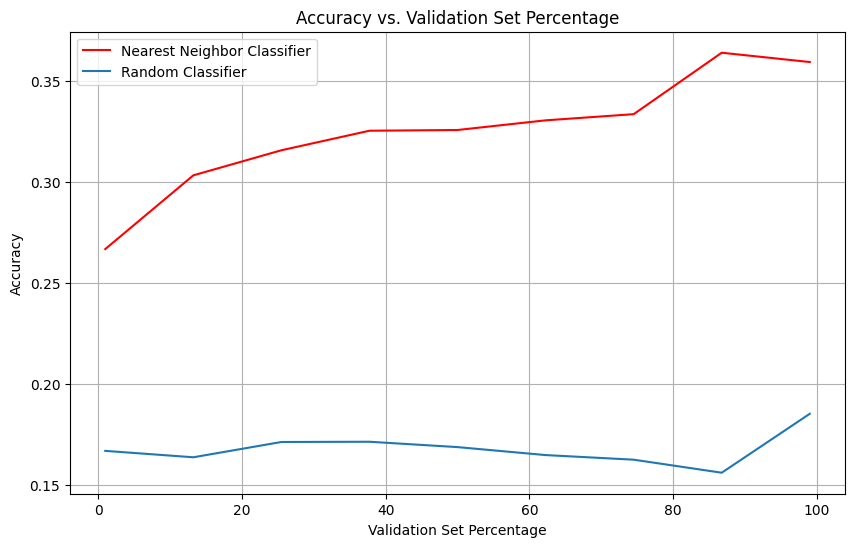

In [32]:
# visulisation
plt.figure(figsize=(10, 6))
plt.plot(validation_set_percentages * 100, nn_accuracies, label='Nearest Neighbor Classifier',color='red')
plt.plot(validation_set_percentages * 100, random_accuracies, label='Random Classifier')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# increasing validation model:
# As you increase the percentage of the validation set, you provide more data for validation, which leads to more reliable estimate of model's performance on unseen data.
# But With a larger validation set, you have less data available for training your model. This results in the model not learning as well from the training data,leading to lower training performance

In [34]:
# Decreasing in Validation Set Percentage:
#When you reduce the percentage of the validation set, you allocate more data to the training set.This can lead to better training performance, where the model fits the training data more closely.
#However,with a smaller validation set,the estimate of your model's performance on unseen data becomes less reliable.

In [35]:
'''
Increasing the validation set percentage generally improves your confidence in the model's ability to generalize but may hurt the training performance.
Decreasing the validation set percentage can boost training performance but may result in a less reliable estimate of generalization performance.
choosing validation set percentage depends on your specific dataset, the complexity of your model.
'''

"\nIncreasing the validation set percentage generally improves your confidence in the model's ability to generalize but may hurt the training performance.\nDecreasing the validation set percentage can boost training performance but may result in a less reliable estimate of generalization performance.\nchoosing validation set percentage depends on your specific dataset, the complexity of your model.\n"

In [36]:

'''Large Training Set:
 A larger training set allows your model to learn from more data, potentially improving its ability to capture underlying patterns in the training data. This can lead to better training performance and potentially better generalization to unseen data (including the validation and test sets).
 But With a large training set, you may have a smaller validation set. While this can result in a more reliable estimate of your model's performance on the validation set, it may not be representative enough of the test set, leading to less accurate predictions of test set accuracy.

Small Training Set:
A small training set can allow for a larger validation set, improving the reliability of the validation performance estimate. A larger validation set can provide a better indication of how well the model is likely to generalize.
However, a small training set may result in poor training performance, as the model may not have enough data to learn the underlying patterns. This can lead to underfitting.

Large Validation Set:
A larger validation set can provide a more robust estimate of your model's performance, reducing the variance in the estimate. It can help you better predict how well your model will perform on unseen data.
If you allocate a large portion of your data to the validation set, you may have a smaller training set, potentially leading to poorer training performance.

Small Validation Set:
A small validation set can result in better training performance, as more data is available for training. However, it may provide a less reliable estimate of generalization performance.
But The estimate of model performance on unseen data might be less trustworthy with a smaller validation set, potentially leading to overfitting or underestimation of generalization errors.

the size of the training and validation sets affects the predictability of accuracy on the test set as a trade-off between training performance and validation performance.
Finding the right balance depends on your specific dataset and modeling goals.
Techniques like cross-validation can help mitigate some of these challenges by providing more robust estimates of model performance across multiple train-validation splits.
'''






"Large Training Set:\n A larger training set allows your model to learn from more data, potentially improving its ability to capture underlying patterns in the training data. This can lead to better training performance and potentially better generalization to unseen data (including the validation and test sets).\n But With a large training set, you may have a smaller validation set. While this can result in a more reliable estimate of your model's performance on the validation set, it may not be representative enough of the test set, leading to less accurate predictions of test set accuracy.\n\nSmall Training Set:\nA small training set can allow for a larger validation set, improving the reliability of the validation performance estimate. A larger validation set can provide a better indication of how well the model is likely to generalize.\nHowever, a small training set may result in poor training performance, as the model may not have enough data to learn the underlying patterns. Thi

In [38]:
'''
The choice of an appropriate percentage to reserve for the validation set depends on various factors, including the size of your dataset, the complexity of your model
*using cross-validation techniques like k-fold cross-validation or stratified sampling, helping how well your model generalizes
*If you have a large dataset, you can allocate a larger percentage to the validation set. A larger validation set allows for a more reliable estimate of model performance.
*For smaller datasets,it's advisable to allocate a smaller percentage to the validation set to ensure you have sufficient data for training. You might consider using techniques like k-fold cross-validation.
*Avoid extreme values like 0.01 or 0.99 which leads to overfitting
*trail and error, It's a good practice to experiment with different validation set percentages and observe how your model's performance changes.
'''

"\nThe choice of an appropriate percentage to reserve for the validation set depends on various factors, including the size of your dataset, the complexity of your model\n*using cross-validation techniques like k-fold cross-validation or stratified sampling, helping how well your model generalizes\n*If you have a large dataset, you can allocate a larger percentage to the validation set. A larger validation set allows for a more reliable estimate of model performance. \n*For smaller datasets,it's advisable to allocate a smaller percentage to the validation set to ensure you have sufficient data for training. You might consider using techniques like k-fold cross-validation.\n*Avoid extreme values like 0.01 or 0.99 which leads to overfitting\n*trail and error, It's a good practice to experiment with different validation set percentages and observe how your model's performance changes. \n"

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [41]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [42]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3411504387657088
test accuracy is  0.8476190476190476


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc.  For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [44]:
'''
1.
Yes, averaging the validation accuracy across multiple splits (using k-fold cross-validation) typically gives more consistent and reliable results compared to using a single validation set.
*It provides more robust and consistent results, reduces the impact of randomness, and gives you a better understanding of how your model is likely to perform on unseen data.
* It is particularly valuable when you want to make more confident decisions about model selection, hyperparameter tuning, and assessing generalization performance.

2.
By averaging validation accuracy over multiple folds in cross-validation, you obtain a more reliable estimate of how well your model is likely to generalize to unseen data.
It helps you assess the model's performance on different parts of your dataset, reducing the risk of overfitting to a single validation set.
cross-validation allows you to assess how consistent your model's performance is across different data subsets.

3.
*for fewer iterations ( smaller k values) can make cross-validation computationally less expensive and faster, especially when you have a large dataset or complex models.
With a smaller number of iterations, you have fewer opportunities to assess your model's performance on different subsets of the data. This can lead to a less stable estimate of model performance.

*for more iterations (larger k values) provides a more thorough and robust estimate of your model's generalization performance. It allows you to assess the model's performance on a larger variety of data subsets.
While more iterations provide a better estimate,but with increased computational cost. Training and evaluating the model multiple times can be time-consuming, especially when working with large datasets or complex models.

common choice is 5 or 10 fold based on computation resources available.

4. results in k-1
  Average validation accuracy is  0.3411504387657088
test accuracy is  0.8476190476190476
'''


"\n1.\nYes, averaging the validation accuracy across multiple splits (using k-fold cross-validation) typically gives more consistent and reliable results compared to using a single validation set.\n*It provides more robust and consistent results, reduces the impact of randomness, and gives you a better understanding of how your model is likely to perform on unseen data.\n* It is particularly valuable when you want to make more confident decisions about model selection, hyperparameter tuning, and assessing generalization performance.\n\n2.\nBy averaging validation accuracy over multiple folds in cross-validation, you obtain a more reliable estimate of how well your model is likely to generalize to unseen data.\nIt helps you assess the model's performance on different parts of your dataset, reducing the risk of overfitting to a single validation set.\ncross-validation allows you to assess how consistent your model's performance is across different data subsets.\n\n3.\n*for fewer iteratio

In [46]:
# Function to calculate average accuracy with increase in iterations
def AverageAccuracyWithIncreasedIterations(alldata, alllabel, splitpercent, iterations, classifier=NN):
    total_accuracy = 0
    for _ in range(iterations):
        # Split the data into training and validation sets
        traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)

        # Train and evaluate the classifier
        valpred = classifier(traindata, trainlabel, valdata)

        # Calculate and accumulate accuracy
        accuracy = Accuracy(vallabel, valpred)
        total_accuracy += accuracy

    # Calculate the average accuracy over iterations
    average_accuracy = total_accuracy / iterations

    return average_accuracy

# trying with increased iterations
small_train_accuracy = AverageAccuracyWithIncreasedIterations(alltraindata, alltrainlabel, 0.75, 50, classifier=NN)
print(f"Average Validation Accuracy with Increased Iterations: {small_train_accuracy}")


Average Validation Accuracy with Increased Iterations: 0.3403142072650367


In [47]:
# we can see there's no much change in accuracy but usually if you have a very small training or validation dataset, you can improve the stability and reliability of your model's performance estimate by increasing the number of iterations (cross-validation folds) when evaluating the model.